In [1]:
from DataAnalysis import *
from Plotting import *

# Global Figures

In [2]:
filtered_days=[]#'2018-06-07', '2018-06-06']
aggregator =""
label_table = "clicks"
ratioLabel = "Ratio"

In [3]:
filename = get_filename(label_table, aggregator)
df_clicks = read_and_clean(filename, label_table,aggregator, filtered_days)
[df_clicks_by_day, df_clicks_by_hour] = split(df_clicks, label_table)

In [1]:
display(display_global_rows([(df_clicks_by_day, "day"), (df_clicks_by_hour, "hour")], ["Count", "clicks", "Ratio"]))  

0


The aggregation per day is the sum of clicks over one day. The mean value is the mean value over all the past days. The std is measuring the dispersion around the mean over all the past days.

The aggregation per hour is the sum of clicks over one hour of the day, averaged over all the past days. The mean value is the mean value over all the hours of one day. The std is measuring the dispersion around the mean over all the hours of one day.

## Plots per day 

In [2]:
plot_df(df_clicks_by_day,"Day", "Count", 'Log count per day', True)

This plot represents the sum of logs per day over all the time period. We can see on this plot that there seems to be a week seasonality and maybe a increasing trend (needs more data to identify it).

## Per hour 

In [3]:
plot_df(df_clicks_by_hour,"Hour", "Count", 'Log count per hour', True)

# Main aggregations

## Retailers (cbs_media_source_id)

In [33]:
aggregator = "cbs_page_type"

min_percentage_volume = 1
max_sum_percentage_volume = 90

filename = get_filename("clicks", aggregator)
df_clicks = read_and_clean(filename, label_table,aggregator, filtered_days)


In [21]:

def get_top_values_for_aggregator3(df, aggregator, volume_label, cropping_threshold=0, cropping_nb_rows=-1, subplot=0):
    df_grouped = group_by_label_sum(df, aggregator, volume_label, False)
    df_grouped = compute_percentage_volumes(df_grouped, volume_label)

    # Crop to restrain to the volumes higher than 1 percent of total volume
    df_crop = crop_and_group_others(df_grouped, aggregator, "Percentage " + volume_label, cropping_threshold,
                                    cropping_nb_rows)

    return [df_crop[aggregator].as_matrix(), df_crop]

def p(df, aggregator, volume_label, subplot):
    plt.subplot(subplot)
    plt.title(aggregator + " per " + volume_label, size=20)
    plt.pie(df["Percentage " + volume_label], labels=df[aggregator], autopct='%.0f%%')



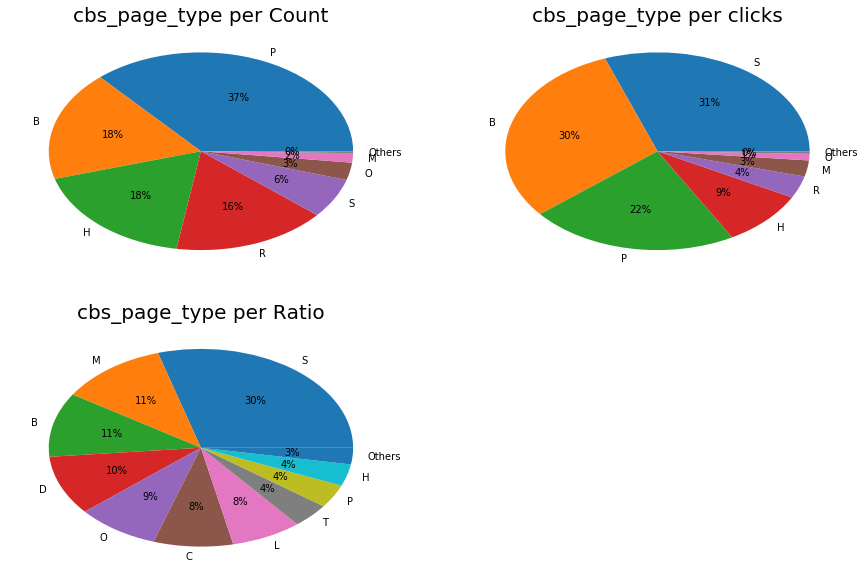

In [34]:
plt.figure(figsize=(15, 10))

volume_label = "Count"
[top_ids_count, df_crop] = get_top_values_for_aggregator3(df_clicks, aggregator, volume_label, cropping_threshold = 1, subplot=221)
p(df_crop, aggregator, volume_label, 221)

volume_label = "clicks"
[top_ids_count, df_crop] = get_top_values_for_aggregator3(df_clicks, aggregator, volume_label, cropping_threshold = 1, subplot=221)
p(df_crop, aggregator, volume_label, 222)
#plt.subplot(222)
#top_ids = get_top_values_for_aggregator2(df_clicks, aggregator, volume_label, cropping_threshold = 1, subplot=222)

volume_label = "Ratio"
[top_ids_count, df_crop] = get_top_values_for_aggregator3(df_clicks, aggregator, volume_label, cropping_nb_rows = 10, subplot=221)
p(df_crop, aggregator, volume_label, 223)
#plt.subplot(223)
#top_ids = get_top_values_for_aggregator2(df_clicks, aggregator, volume_label, cropping_nb_rows = 10, subplot=223)

In [35]:
display_rows_by_aggretor(df_clicks, aggregator, label_table, top_ids_count[:-1])

+-------------------+------------+-----------+------------------+
|                   |    Mean    |    Std    | Std/Mean percent |
+===================+============+===========+==================+
| S: Count per day  | 7,762,146  | 1,281,587 | 16.5%            |
+-------------------+------------+-----------+------------------+
| S: Count per hour | 323,626    | 136,556   | 42.2%            |
+-------------------+------------+-----------+------------------+
| M: Count per day  | 1,847,383  | 528,654   | 28.6%            |
+-------------------+------------+-----------+------------------+
| M: Count per hour | 77,002     | 37,424    | 48.6%            |
+-------------------+------------+-----------+------------------+
| B: Count per day  | 21,547,947 | 1,899,622 | 8.8%             |
+-------------------+------------+-----------+------------------+
| B: Count per hour | 898,445    | 342,138   | 38.1%            |
+-------------------+------------+-----------+------------------+
| D: Count

### Analyse one retailer 

In [32]:
id = 131
df_aggregator = df_clicks[df_clicks[aggregator] == id]
[df_aggregator_by_day, df_aggregator_by_hour] = split(df_aggregator, label_table)

In [28]:
rows = [["", "Mean", 'Std', "Std/Mean percent"]]
update_rows(rows, [(df_aggregator_by_day, "day"), (df_aggregator_by_hour, "hour")], 
            ["Count", "clicks", "Ratio"], str(id))
display(rows)

+----------------------+------------+-----------+------------------+
|                      |    Mean    |    Std    | Std/Mean percent |
+======================+============+===========+==================+
| 131: Count per day   | 28,003,891 | 2,105,620 | 7.5%             |
+----------------------+------------+-----------+------------------+
| 131: Count per hour  | 1,167,506  | 459,743   | 39.4%            |
+----------------------+------------+-----------+------------------+
| 131: clicks per day  | 21,794     | 6,914     | 31.7%            |
+----------------------+------------+-----------+------------------+
| 131: clicks per hour | 909        | 357       | 39.3%            |
+----------------------+------------+-----------+------------------+
| 131: Ratio per day   | 0.080      | 0.020     | 28.5%            |
+----------------------+------------+-----------+------------------+
| 131: Ratio per hour  | 0.080      | 0.010     | 9.0%             |
+----------------------+----------

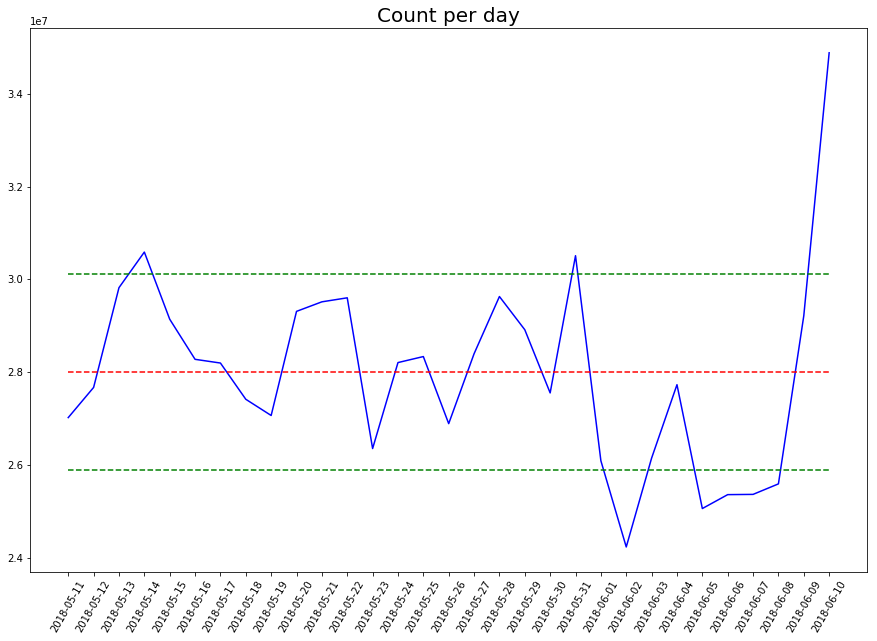

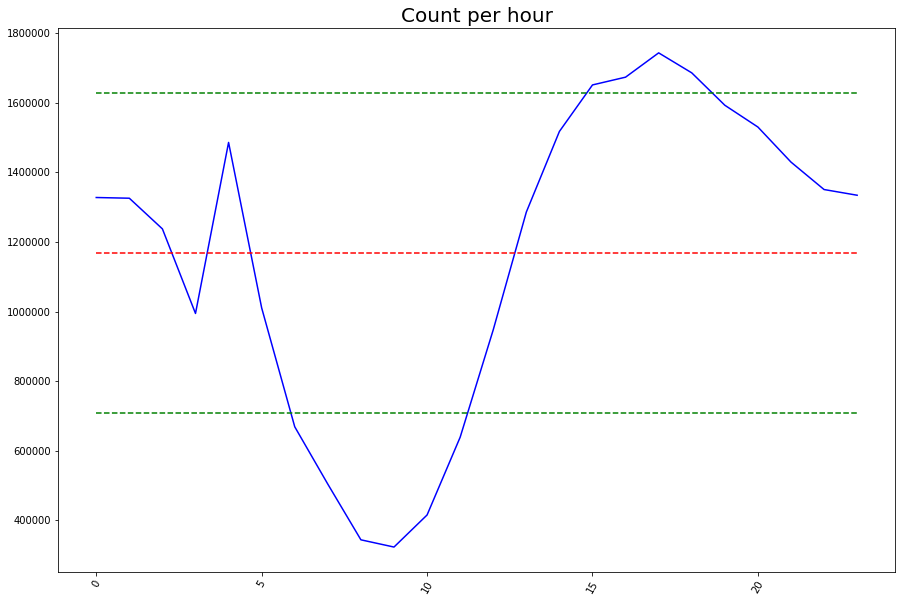

In [29]:
volume_label = "Count"
plot_df(df_aggregator_by_day,"Day", volume_label, volume_label+ " per day", True)
plot_df(df_aggregator_by_hour,"Hour", volume_label, volume_label+ " per hour", True)

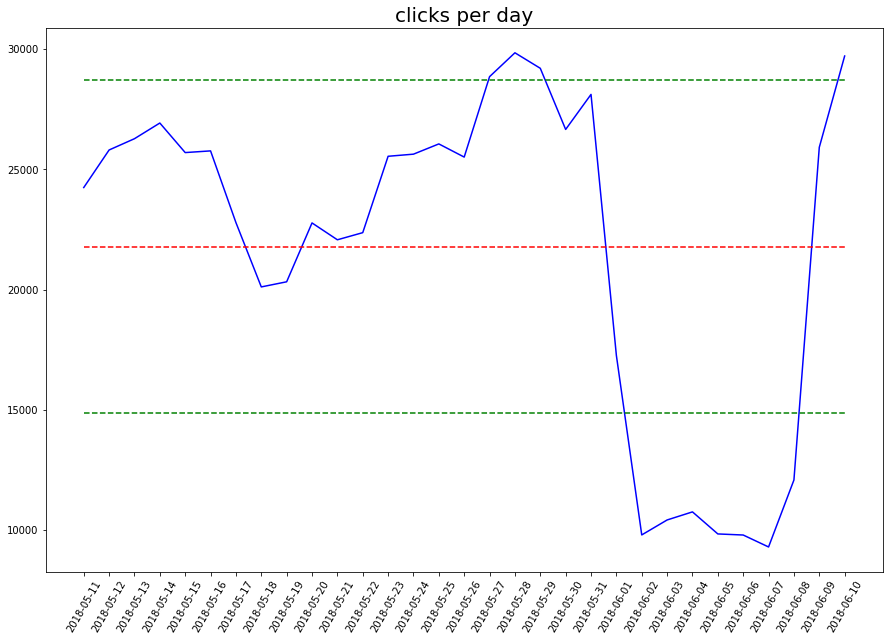

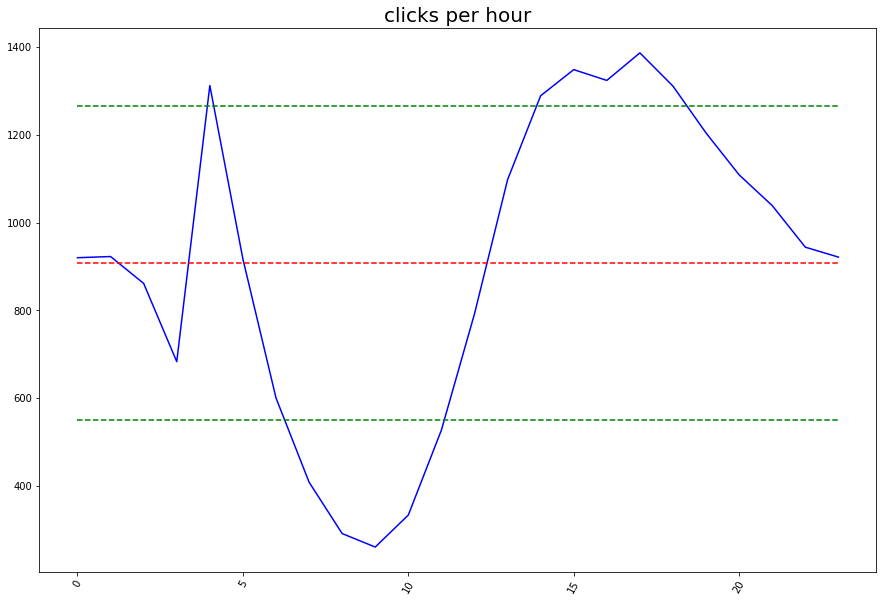

In [30]:
volume_label = "clicks"
plot_df(df_aggregator_by_day,"Day", volume_label, volume_label+ " per day", True)
plot_df(df_aggregator_by_hour,"Hour", volume_label, volume_label+ " per hour", True)

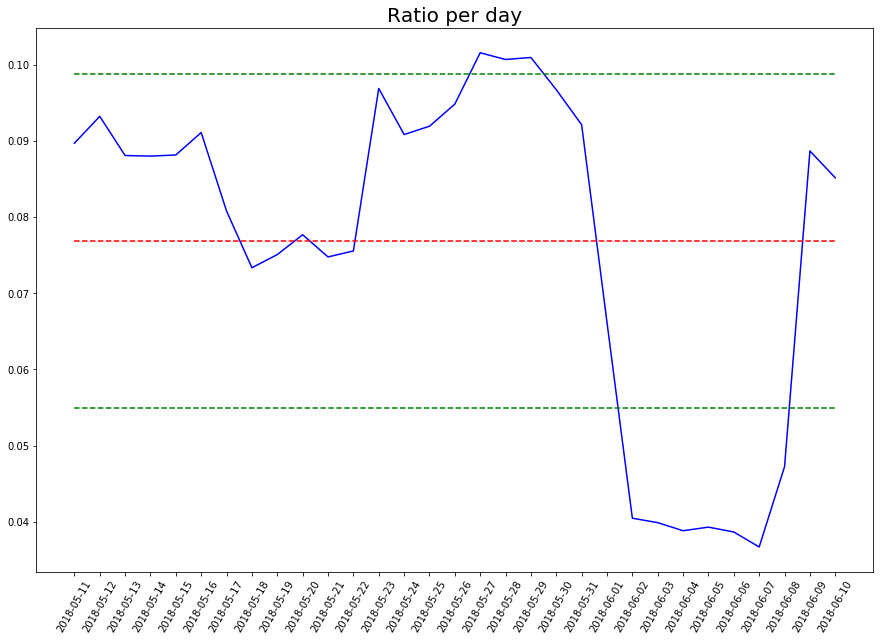

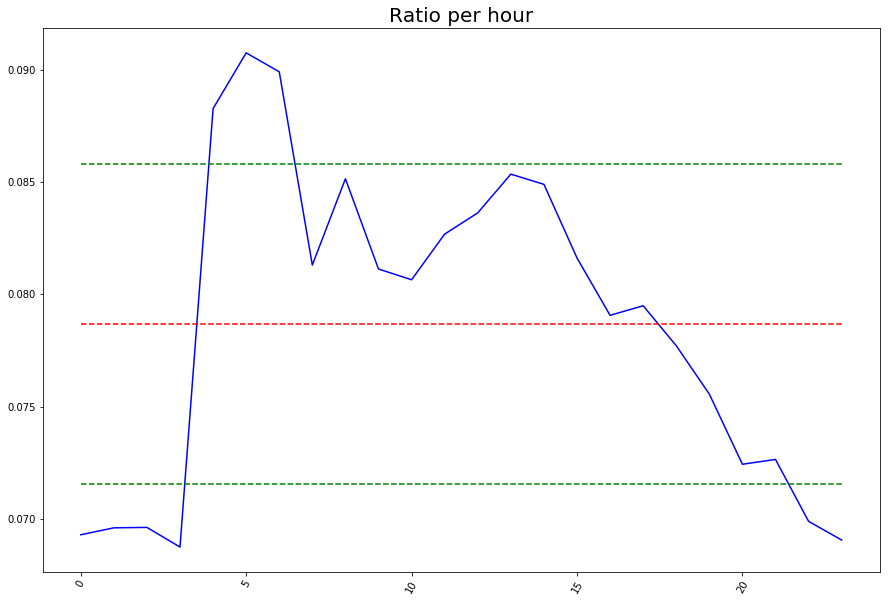

In [31]:
volume_label = "Ratio"
plot_df(df_aggregator_by_day,"Day", volume_label, volume_label+ " per day", True)
plot_df(df_aggregator_by_hour,"Hour", volume_label, volume_label+ " per hour", True)